In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

poke = pd.read_csv('Desktop/datasets/Dimension_reduction_datasets/pokemon.csv')

In [ ]:
poke.head()

In [3]:
poke_num = poke.drop(['#','Name','Type 1','Type 2'],axis=1)

In [4]:
poke_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8)
memory usage: 50.9 KB


In [5]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)

In [6]:
tsne_features = m.fit_transform(poke_num)

In [7]:
tsne_features[1:5,:]

array([[-12.201347 ,  -2.069931 ],
       [ 24.396275 ,   5.708549 ],
       [ 50.030994 ,   1.6313847],
       [-42.898632 ,   1.9761274]], dtype=float32)

In [8]:
poke['x'] = tsne_features[:,0]
poke['y'] = tsne_features[:,1]

In [9]:
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,x,y
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,-39.321438,-4.334542
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,-12.201347,-2.069931
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,24.396275,5.708549
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,50.030994,1.631385
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,-42.898632,1.976127


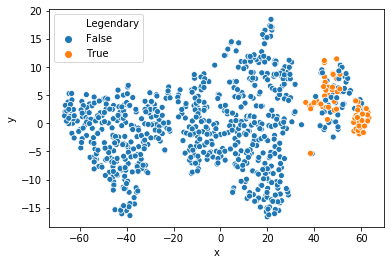

In [10]:
sns.scatterplot(x="x",y="y",data=poke,hue = 'Legendary')